# "[Colab]모두를 위한 머신러닝 강의 정리 "

- toc:true
- branch: master
- badges: true
- author: shw9807

# 모두를 위한 머신러닝

## Lecture 1 : 기본적인 Machine Learning의 용어와 개념 설명
### Machine Learning 이란?
: 학습을 통해서 뭔가를 배우는 능력을 갖는 프로그램

    1.Supervised learning
    - 이미 label들이 정해져 있는 데이터를 통해서 학습
    2.Unsupervised learning
    - label을 정해주는 것이 아니라 데이터만을 보고 스스로 학습

### Supervised learning
#### 일반적으로 사용하는 방법
- 이미지 라벨링
- 이메일 스팸 필터
- 시험 성적 예측

#### Supervised learning의 종류
- 회귀모형
- 이항 분류
- multi-label 분류

## Lecture 2 : Linear Regression
세상에서 관측되는 여러 현상들은 선형 모델로 설명되는 경우가 굉장히 많음.

### (Linear) Hypothesis (가설)
$ H(x) = Wx + b $

### Cost function (= Loss function)
가설이 실제 데이터와 얼마나 일치하는가  
$ (H(x) - y)^2 $  
$ cost(W,b) = \frac{1}{m} \displaystyle\sum_{i=1}^{m}{(H(x^{(i)} )-y^{(i)} )^2} $

### 목표 : Minimize cost
$ minimize\,cost(W,b) $







## Lecture 3 : How to minimize cost

### Gradient descent algorithm
$cost(W,b)$에서 뿐만 아니라 많은 값을 가지는 cost function도 minimize 할 수 있다.
> 1. 아무 값에서든 시작한다.
2.cost(W,b)를 감소시키는 방향으로 W와 b를 조금 변화시킨다.
3. 더 이상 변화시킬 수 없을 때까지 반복한다.
- 이 알고리즘의 장점
: 어떤 점에서 시작하든 같은 최솟값을 얻을 수 있다.(몇몇 예외의 경우를 제외하고)

### Formal definition
$ cost(W,b) = \frac1m \displaystyle\sum_{i=1}^{m}{(Wx^{(i)}-y^{(i)} )^2} $
$\to cost(W,b) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m}{(Wx^{(i)}-y^{(i)} )^2} $
미분을 쉽게 하기 위해 분모를 2m으로 변화시킨다. 

$ W := W - \alpha \frac{d}{dW} cost(W)$  
$ W := W - \alpha\frac{d}{dW}\frac{1}{2m} \displaystyle\sum_{i=1}^{m}{(Wx^{(i)}-y^{(i)} )^2}$  
$ W := W - \alpha\frac{1}{2m} \displaystyle\sum_{i=1}^{m}{2(Wx^{(i)}-y^{(i)} )x^{(i)}}$  
$ W := W - \alpha\frac{1}{m} \displaystyle\sum_{i=1}^{m}{(Wx^{(i)}-y^{(i)} )x^{(i)}}$

### Gradient descent algorithm
$ W := W - \alpha\frac{1}{m} \displaystyle\sum_{i=1}^{m}{(Wx^{(i)}-y^{(i)} )x^{(i)}}$

Gradient descent algorithm을 적용하기 전 cost function의 모양을 확인해봐야함  
-> 최소제곱법???

## Lecture 4 : Multivariable linear regression

### Hypothesis

$ H(x_1,x_2,x_3) = w_1x_1 + w_2x_2 + w_3x_3 + b$

### cost function
$ cost(W,b) = \frac1m \displaystyle\sum_{i=1}^{m}{(H(x_1^{(i)},x_2^{(i)},x_3^{(i)})-y^{(i)} )^2} $

### Hypothesis using matrix
$w_1x_1 + w_2x_2 + w_3x_3 +... +w_nx_n$  
  
$ (x_1\,x_2\,x_3) ·\begin{pmatrix}w_1\\w_2\\w_3\ \end{pmatrix} = (x_1w_1 + x_2w_2 + x_3w_3)  \\ H(X) = XW $


### WX vs XW

- Lecture (theory) :  
$ H(x) = Wx + b $
- Implementation (TensorFlow) :  
$ H(X) = XW$

## Lecture 5-1 : Logistic(regression) classification
- classification algorithm 중에서 굉장히 정확도가 높은 알고리즘
- 실제 문제에도 바로 적용할 수 있음.
- 수업의 궁극적 목표인 뉴럴 네트워크와 deep learning 에 굉장히 중요한 component

### Regression
- Hypothesis: $H(X) = WX$
- Cost: $cost(W) = \frac1m \sum(WX-y)^2$
- Gradient decent: $W := W - \alpha \frac{d}{dW}cost(W)$

### (Binary) Classification
- Spam Detection: Spam or Ham
- Facebook feed: show or hide
- Credit Cart Fraudulent Transaction detection

### Linear regression
- We know Y is 0 or 1  
$ H(x) = Wx + b $
- Hypothesis 는 1보다 크거나 0보다 작은 값을 가질 수도 있다.



### Logistic Hypothesis
$ H(X) = \frac1{1+e^{-W^TX}} $


## Lecture 5-2 : Logistic(regression) classification: <br/>cost function & gradient decent

### New cost function for logistic

$ cost(W) = \frac1m \sum c(H(x),y) $  
$ c(H(x),y) = \begin{cases} -log(H(x))\quad\;\;:y=1 \\ -log(1-H(x))\, :y=0\end{cases}$  
$C(H(x),y) = -ylog(H(x)) - (1-y)log(1-H(x))$

### Gradient decent algorithm
$W:= W-\alpha\frac d{dW}cost(W)$

In [1]:
# cost function
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis)))

#Minimize
a = tf.Variable(0.1) # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

NameError: name 'tf' is not defined

## Lecture 6-1 : Softmax classification :<br/> Multinomial classification

### Multinomial classification
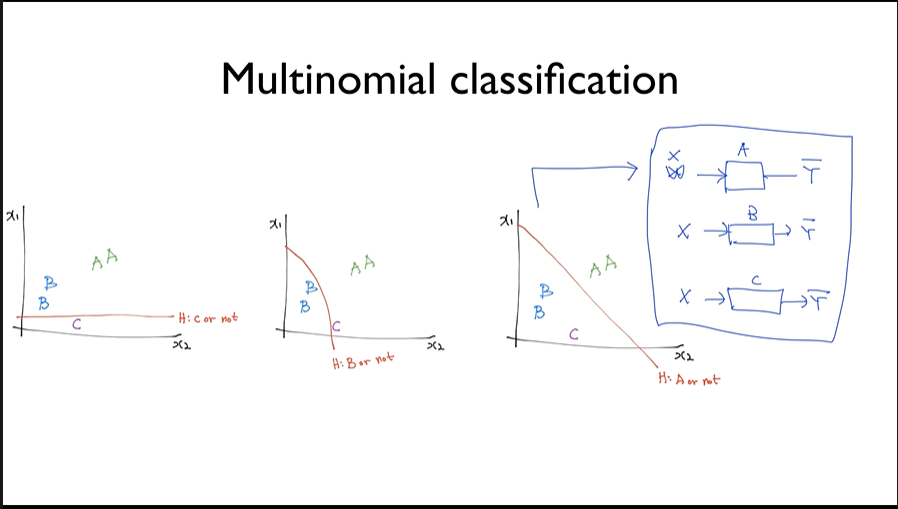

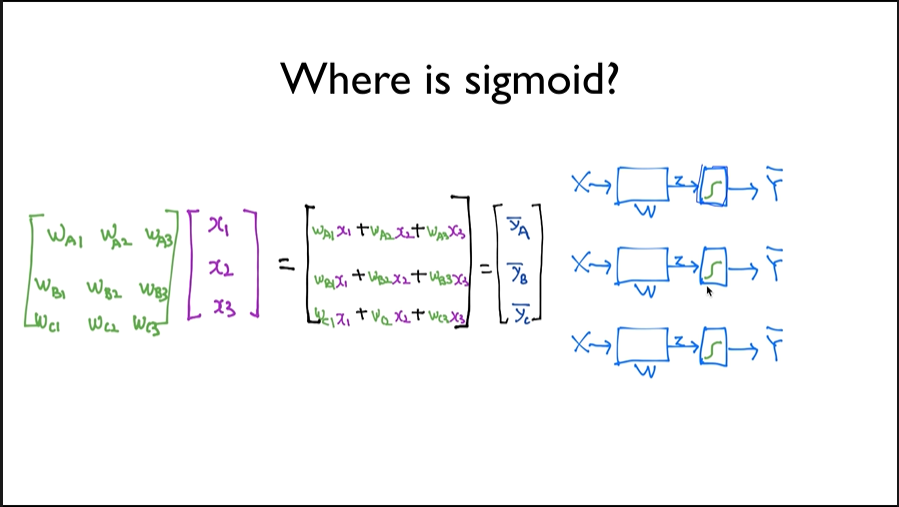


## Lecture 6-2 : Softmax classifier의 cost function
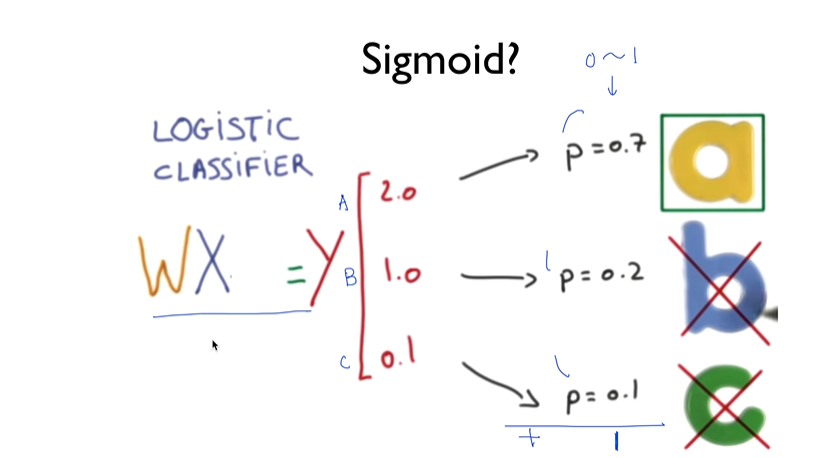
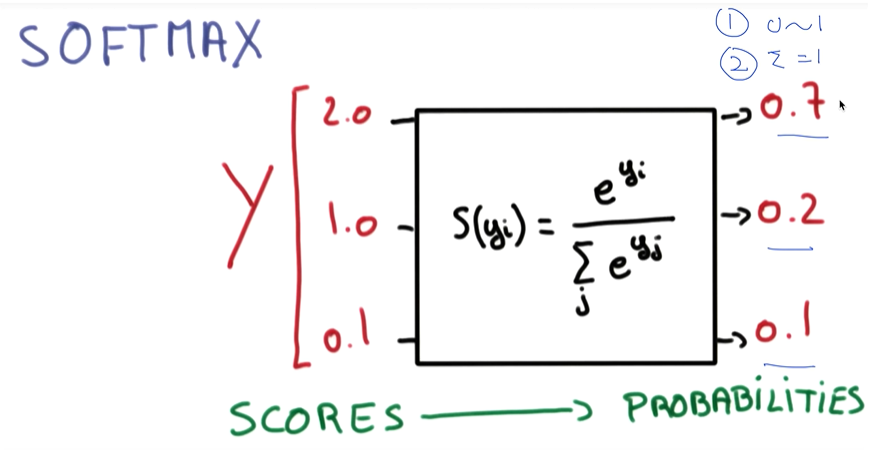
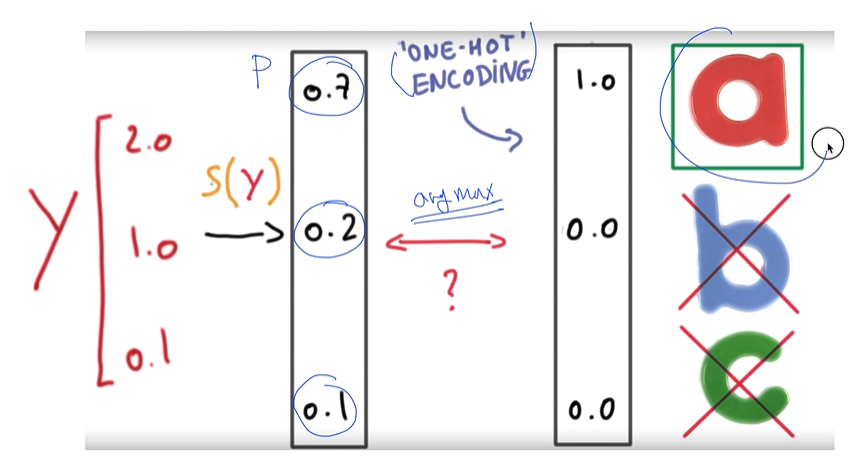
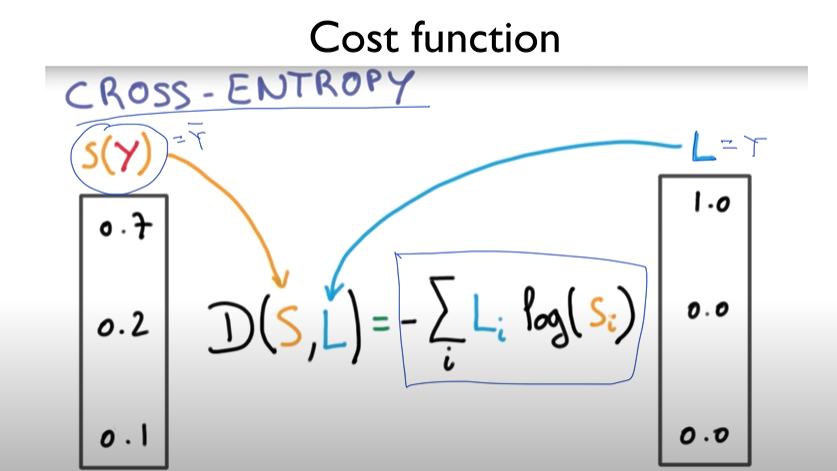
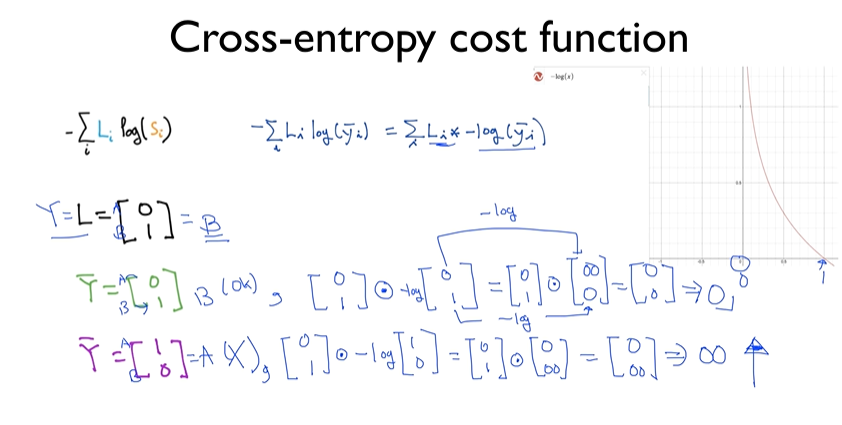